# loading the sales data into data frames to make summary tables and a few plots per region. I took around 30minutes to do this plus a little time to add notes and put onto github

In [5]:
import pandas as pd;
import numpy as np;
df = pd.read_csv('expedia.csv')

In [34]:
df.describe()
df.pitches_count = pd.to_numeric(df.pitches_count,errors='coerce')
df.wins_count = pd.to_numeric(df.wins_count,errors='coerce')
df = df[['employee_id', 'employee_super_region', 'year_nbr', 'month_nbr',
       'active_days', 'interactions_count', 'pitches_count', 'wins_count']]
print(df.columns)

Index(['employee_id', 'employee_super_region', 'year_nbr', 'month_nbr',
       'active_days', 'interactions_count', 'pitches_count', 'wins_count'],
      dtype='object')


# evaluate by employee

In [55]:
df_employee = df.groupby('employee_id').sum()
df_employee['win_per_day'] = df_employee.wins_count/df_employee.active_days
df_employee['win_per_int'] = df_employee.wins_count/df_employee.interactions_count
df_employee['win_per_pit'] = df_employee.wins_count/df_employee.pitches_count
df_employee['pit_per_day'] = df_employee.pitches_count/df_employee.active_days
df_employee['pit_per_int'] = df_employee.pitches_count/df_employee.interactions_count

df_employee.describe()


,year_nbr,month_nbr,active_days,interactions_count,pitches_count,wins_count,win_per_day,win_per_int,win_per_pit,pit_per_day,pit_per_int
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1113.000000,1118.000000,1118.000000
mean,13713.652057,57.879249,88.616279,712.883721,1758.214669,419.192308,4.296552,0.579777,0.248201,17.828248,2.376413
std,4161.271010,17.256885,36.040716,375.561570,1073.418528,265.054626,2.179049,0.255524,0.108954,8.398987,0.705637
min,2020.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12120.000000,57.000000,73.250000,511.250000,1084.500000,248.000000,2.985571,0.447092,0.194534,13.494774,2.000000
50%,16160.000000,68.000000,103.000000,743.000000,1732.500000,405.500000,4.143594,0.562496,0.237029,17.428015,2.362033
75%,16160.000000,68.000000,115.000000,964.000000,2408.750000,579.000000,5.488219,0.684795,0.283278,22.359497,2.735488
max,20200.000000,78.000000,138.000000,2175.000000,6035.000000,1589.000000,13.581197,3.000000,1.000000,63.481481,8.000000


# General recommendations
# Top 75% of employees have 5.5 or more wins per day
# Top 75% have a win per interaction of 68%
# Top 75% have wins per pitch of 28%
# 2.7 pitches per interaction, so more pitches
# 22.3 pitches/day

# Started looking at some correlations to see if these are really good metrics. By this I mean does more pitches correlate with more wins. with a correlation of 

In [56]:
print(df_employee.corr())

                    year_nbr  month_nbr  active_days  interactions_count  \
year_nbr            1.000000   0.982687     0.910034            0.767464   
month_nbr           0.982687   1.000000     0.915179            0.773436   
active_days         0.910034   0.915179     1.000000            0.869463   
interactions_count  0.767464   0.773436     0.869463            1.000000   
pitches_count       0.684313   0.691820     0.783383            0.902368   
wins_count          0.644296   0.652844     0.736159            0.848660   
win_per_day         0.442559   0.459654     0.490005            0.654028   
win_per_int         0.016927   0.036297     0.043049            0.061312   
win_per_pit        -0.144291  -0.137722    -0.144344           -0.109880   
pit_per_day         0.537574   0.551166     0.589686            0.762975   
pit_per_int         0.205635   0.225571     0.243524            0.242126   

                    pitches_count  wins_count  win_per_day  win_per_int  \
year_nbr    

array([[<AxesSubplot:title={'center':'win_per_pit'}>]], dtype=object)

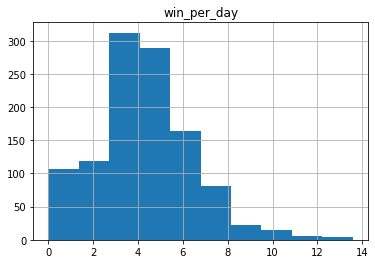

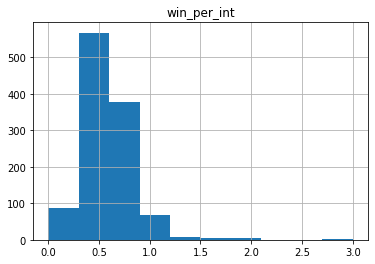

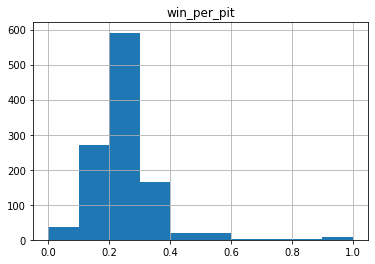

In [48]:
df_employee.hist('win_per_day')
df_employee.hist('win_per_int')
df_employee.hist('win_per_pit')


In [35]:
df_region = df.groupby(['employee_id','employee_super_region']).sum()
df_region['win_per_day'] = df_region.wins_count/df_region.active_days
df_region['win_per_int'] = df_region.wins_count/df_region.interactions_count
df_region['win_per_pit'] = df_region.wins_count/df_region.pitches_count
df_region.describe()

,year_nbr,month_nbr,active_days,interactions_count,pitches_count,wins_count,win_per_day,win_per_int,win_per_pit
count,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1118.000000,1113.000000
mean,13713.652057,57.879249,88.616279,712.883721,1758.214669,419.192308,4.296552,0.579777,0.248201
std,4161.271010,17.256885,36.040716,375.561570,1073.418528,265.054626,2.179049,0.255524,0.108954
min,2020.000000,5.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12120.000000,57.000000,73.250000,511.250000,1084.500000,248.000000,2.985571,0.447092,0.194534
50%,16160.000000,68.000000,103.000000,743.000000,1732.500000,405.500000,4.143594,0.562496,0.237029
75%,16160.000000,68.000000,115.000000,964.000000,2408.750000,579.000000,5.488219,0.684795,0.283278
max,20200.000000,78.000000,138.000000,2175.000000,6035.000000,1589.000000,13.581197,3.000000,1.000000


# clear that Europe is a little lower than the americas. wins/active day is around 4 compared to 5 for the US.
# would be interested why there are quite a few sales without region. maybe it was multi-region

array([[<AxesSubplot:title={'center':'AMER'}>,
        <AxesSubplot:title={'center':'APAC'}>],
       [<AxesSubplot:title={'center':'EMEA'}>,
        <AxesSubplot:title={'center':'LATAM'}>],
       [<AxesSubplot:title={'center':'\\N'}>, <AxesSubplot:>]],
      dtype=object)

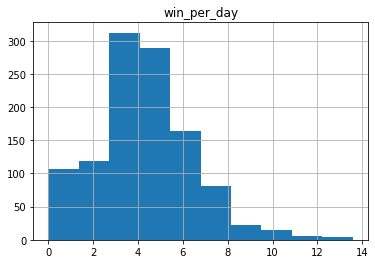

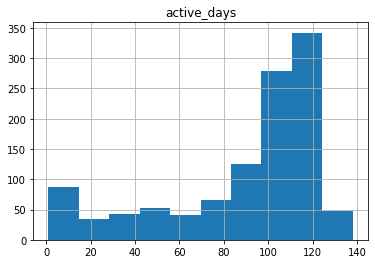

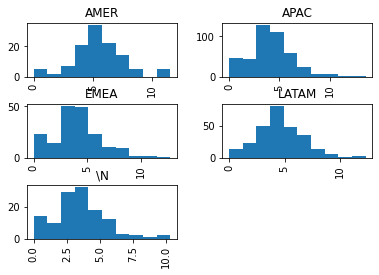

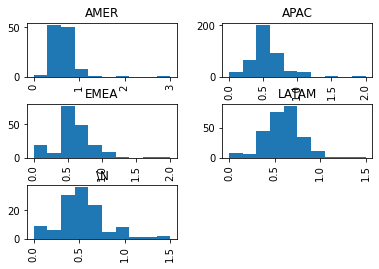

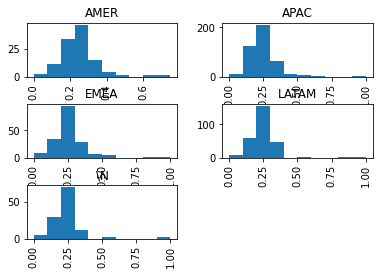

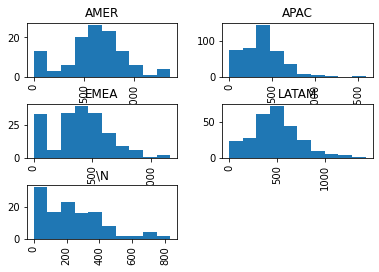

In [67]:
df_region.hist('win_per_day')#,ax=df.loc[:,"employee_super_region"])
df_region.hist('active_days')
df_region.hist(column='win_per_day', by = 'employee_super_region')
df_region.hist(column='win_per_int', by = 'employee_super_region')
df_region.hist(column='win_per_pit', by = 'employee_super_region')
df_region.hist(column='wins_count', by = 'employee_super_region')

